# Inspection of our dataset Self-Annotated Reddit Corpus (SARC) and News Headlines

In [2]:
!pip3 install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 371 kB 7.9 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/share/pkg.7/python3/3.8.6/install/bin/python3.8 -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import pandas as pd
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib
from matplotlib import pyplot as plt

## 1. SARC Data

In [2]:
sarc_dat = pd.read_csv('train-balanced-sarcasm.csv')

In [3]:
sarc_dat.head(10)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
5,0,"I don't pay attention to her, but as long as s...",only7inches,AskReddit,0,0,0,2016-09,2016-09-02 10:35:08,do you find ariana grande sexy ?
6,0,Trick or treating in general is just weird...,only7inches,AskReddit,1,-1,-1,2016-10,2016-10-23 21:43:03,What's your weird or unsettling Trick or Treat...
7,0,Blade Mastery+Masamune or GTFO!,P0k3rm4s7,FFBraveExvius,2,-1,-1,2016-10,2016-10-13 21:13:55,Probably Sephiroth. I refuse to taint his grea...
8,0,"You don't have to, you have a good build, buy ...",SoupToPots,pcmasterrace,1,-1,-1,2016-10,2016-10-27 19:11:06,What to upgrade? I have $500 to spend (mainly ...
9,0,I would love to see him at lolla.,chihawks,Lollapalooza,2,-1,-1,2016-11,2016-11-21 23:39:12,Probably count Kanye out Since the rest of his...


In [22]:
sarc_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010773 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


### Remove NA/duplicates

In [4]:
#From info we see that some comments are null, remove them
sarc_dat.dropna(subset=['comment'], inplace=True)
sarc_dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010773 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010773 non-null  int64 
 1   comment         1010773 non-null  object
 2   author          1010773 non-null  object
 3   subreddit       1010773 non-null  object
 4   score           1010773 non-null  int64 
 5   ups             1010773 non-null  int64 
 6   downs           1010773 non-null  int64 
 7   date            1010773 non-null  object
 8   created_utc     1010773 non-null  object
 9   parent_comment  1010773 non-null  object
dtypes: int64(4), object(6)
memory usage: 84.8+ MB


In [25]:
#check for duplicates
print(sum(sarc_dat.duplicated()))

28


In [26]:
sarc_dat.drop_duplicates()
sarc_dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010773 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010773 non-null  int64 
 1   comment         1010773 non-null  object
 2   author          1010773 non-null  object
 3   subreddit       1010773 non-null  object
 4   score           1010773 non-null  int64 
 5   ups             1010773 non-null  int64 
 6   downs           1010773 non-null  int64 
 7   date            1010773 non-null  object
 8   created_utc     1010773 non-null  object
 9   parent_comment  1010773 non-null  object
dtypes: int64(4), object(6)
memory usage: 84.8+ MB


### Data balance, count of sarcastic vs non sarcastic

In [28]:
import seaborn as sns

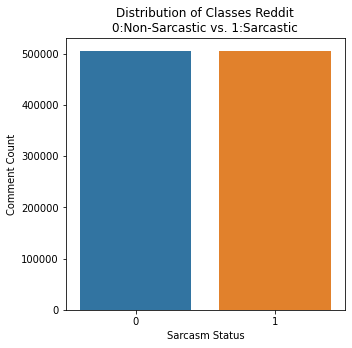

In [34]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='label',  data= sarc_dat)
ax.set(title = "Distribution of Classes Reddit\n0:Non-Sarcastic vs. 1:Sarcastic", xlabel="Sarcasm Status", ylabel = "Comment Count")
plt.show()

As can be seen the distribution of classes is equal

### Wordcloud

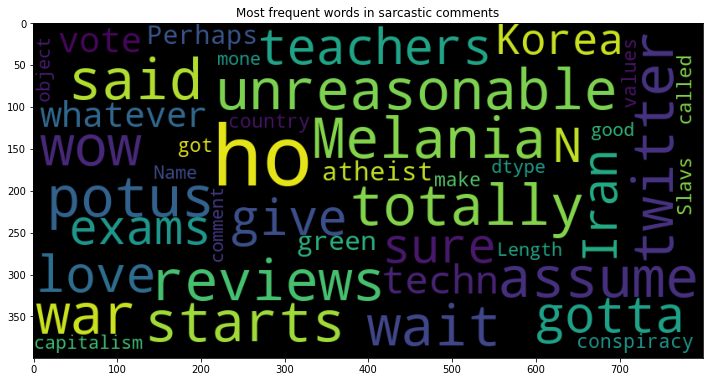

In [39]:
## sarcastic cloud
wordcloud_s = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 300, max_font_size = 100, 
                random_state = 17, width=800, height=400)

plt.figure(figsize=(12, 12))
wordcloud_s.generate(str(sarc_dat.loc[sarc_dat['label'] == 1, 'comment']))
plt.grid(b= False)
plt.title('Most frequent words in sarcastic comments')
plt.imshow(wordcloud_s);

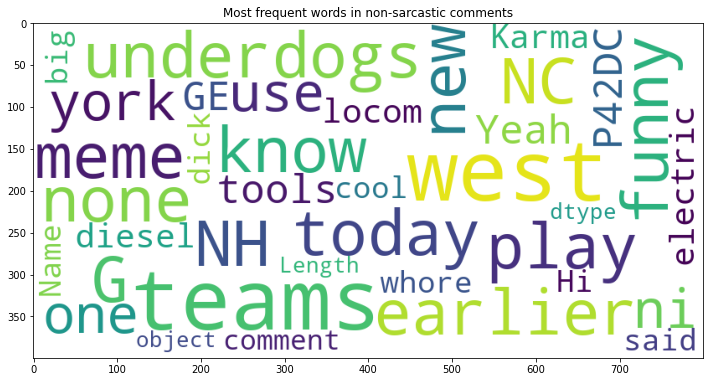

In [40]:
## non-sarcastic cloud
wordcloud_ns = WordCloud(background_color='white', stopwords = STOPWORDS,
                max_words = 300, max_font_size = 100, 
                random_state = 17, width=800, height=400)

plt.figure(figsize=(12, 12))
wordcloud_ns.generate(str(sarc_dat.loc[sarc_dat['label'] == 0, 'comment']))
plt.grid(b= False)
plt.title('Most frequent words in non-sarcastic comments')
plt.imshow(wordcloud_ns);

### Relation of sarcasm with subreddit categories

In [62]:
sub_df = sarc_dat.loc[sarc_dat['label'] == 1].groupby(['subreddit']).size().sort_values(ascending=False)


In [64]:
sub_df.head(10)

subreddit
AskReddit          26365
politics           23907
worldnews          16947
leagueoflegends    11407
pcmasterrace       10759
news               10193
funny               8099
pics                7823
todayilearned       7753
GlobalOffensive     7584
dtype: int64

### Sarcastic Comments = better or worse score?

In [57]:
sarcasm_score = np.sum(np.array(sarc_dat.loc[sarc_dat['label'] == 1]['score']))
neutral_score = np.sum(np.array(sarc_dat.loc[sarc_dat['label'] == 0]['score']))

print("Overall score of sarcastic posts {}".format(sarcasm_score))
print("Overall score of netural posts {}".format(neutral_score))

Overall score of sarcastic posts 3235069
Overall score of netural posts 3725113


### Comments Sarcastic vs. not examples

In [36]:
sarcastics = sarc_dat.loc[sarc_dat['label'] == 1]
neutrals = sarc_dat.loc[sarc_dat['label'] == 0]

idx = sarcastics.index[4]
print()
print()
print()
print("SARCASTIC")
print()
print("'{}'".format(sarcastics.loc[idx,'comment']))
print()
print("Sarcastic (1/0): {} | Subreddit: {} | Popularity score: {}".format(sarcastics.loc[idx,'label'],
                                                                          sarcastics.loc[idx,'subreddit'],
                                                                         sarcastics.loc[idx,'score']))
print()
print()
print()
print("NON-SARCASTIC")
print()
idx2 = neutrals.index[6]
print("'{}'".format(neutrals.loc[idx2,'comment']))
print()
print("Sarcastic (1/0): {} | Subreddit: {} | Popularity score: {}".format(neutrals.loc[idx2,'label'],
                                                                        neutrals.loc[idx2,'subreddit'],
                                                                         neutrals.loc[idx2,'score']))
print()
print()




SARCASTIC

'gotta love the teachers who give exams on the day after halloween'

Sarcastic (1/0): 1 | Subreddit: CFBOffTopic | Popularity score: 3



NON-SARCASTIC

'Trick or treating in general is just weird...'

Sarcastic (1/0): 0 | Subreddit: AskReddit | Popularity score: 1




In [8]:
print()
print('Reddit Comment | Sarcastic (1/0)')
print("-------------------------------------")
for i in range(3):
    j = sarcastics.index[i]
    print("{} | S: {}".format(sarcastics.loc[j,'comment'], sarcastics.loc[j,'label']))
    print()
    k = neutrals.index[i]
    print("{} | S: {}".format(neutrals.loc[k,'comment'], neutrals.loc[k,'label']))
    print()

But they'll have all those reviews!

Sarcastic (1/0): 1 | Subreddit: ProductTesting | Popularity score: 0

Reddit Comment | Sarcastic (1/0)
-------------------------------------
But they'll have all those reviews! | S: 1

NC and NH. | S: 0

wow it is totally unreasonable to assume that the agency that covered up Bush war crimes because "muh republican party" would be partisan as fuck | S: 1

You do know west teams play against west teams more than east teams right? | S: 0

Ho ho ho... But Melania said that there is no way it could have happened because she didn't know the woman! | S: 1

They were underdogs earlier today, but since Gronk's announcement this afternoon, the Vegas line has moved to patriots -1 | S: 0



## 2. News Headlines Data

In [16]:
news_dat = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines=True)

In [17]:
news_dat.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [23]:
news_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


### Remove NA/duplicates

In [65]:
#From info above - see that there are no NA - duplicates
news_dat.drop_duplicates()
news_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


### Data balance, count of sarcastic vs non sarcastic

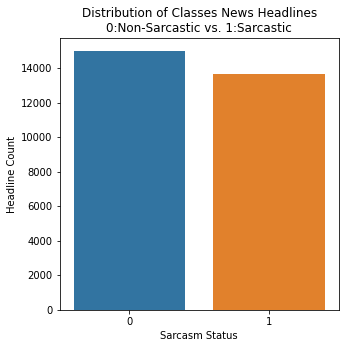

In [66]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='is_sarcastic',  data= news_dat)
ax.set(title = "Distribution of Classes News Headlines\n0:Non-Sarcastic vs. 1:Sarcastic", xlabel="Sarcasm Status", ylabel = "Headline Count")
plt.show()

Slightly more imbalanced than Reddit but still pretty well balacned

### Wordcloud

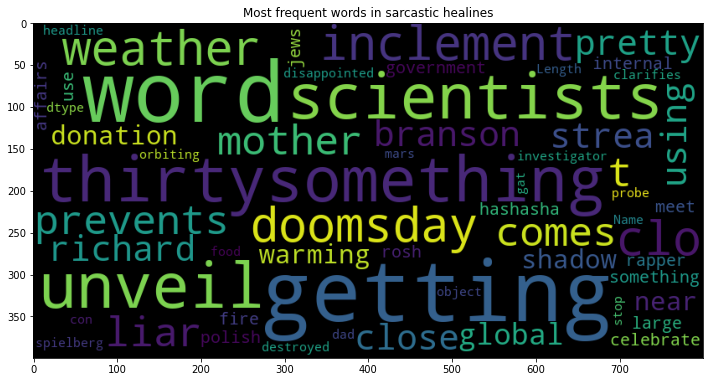

In [67]:
## sarcastic cloud
wordcloud_s = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 300, max_font_size = 100, 
                random_state = 17, width=800, height=400)

plt.figure(figsize=(12, 12))
wordcloud_s.generate(str(news_dat.loc[news_dat['is_sarcastic'] == 1, 'headline']))
plt.grid(b= False)
plt.title('Most frequent words in sarcastic healines')
plt.imshow(wordcloud_s);

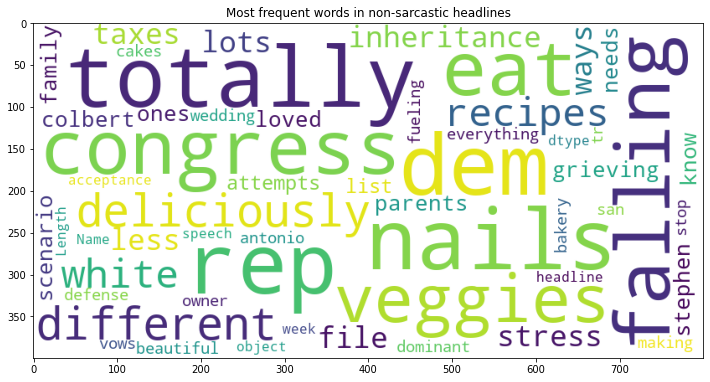

In [69]:
## non-sarcastic cloud
wordcloud_ns = WordCloud(background_color='white', stopwords = STOPWORDS,
                max_words = 300, max_font_size = 100, 
                random_state = 17, width=800, height=400)

plt.figure(figsize=(12, 12))
wordcloud_ns.generate(str(news_dat.loc[news_dat['is_sarcastic'] == 0, 'headline']))
plt.grid(b= False)
plt.title('Most frequent words in non-sarcastic headlines')
plt.imshow(wordcloud_ns)

### Example Headlines

In [94]:
print()
print('Headline | Sarcastic (1/0)')
print("-------------------------------------")
for i in range(5):
    print("{} | S: {}".format(news_dat.loc[i,'headline'], news_dat.loc[i,'is_sarcastic']))
    print()
    


Headline | Sarcastic (1/0)
-------------------------------------
thirtysomething scientists unveil doomsday clock of hair loss | S: 1

dem rep. totally nails why congress is falling short on gender, racial equality | S: 0

eat your veggies: 9 deliciously different recipes | S: 0

inclement weather prevents liar from getting to work | S: 1

mother comes pretty close to using word 'streaming' correctly | S: 1



## 3. Comparison Table

Include:
- Size of data
- Sarcastic vs. non sarcastic items
- Format description
- Contex available? (eg. previous comment as in Reddit)

In [96]:
sarcastics_news = news_dat.loc[news_dat['is_sarcastic'] == 1]

In [99]:
datasets = ['SARC Reddit', 'News Headlines']
no_datapoints = [len(sarc_dat),len(news_dat)]
sarcastic_ratio = [round(len(sarcastics)/len(sarc_dat),2), round(len(sarcastics_news)/len(news_dat), 2)]
formats = ['10 cols; Reddit comments + metadata + labels', '3 cols; Headlines + article link + labels']
context_incl = ['Yes', 'No']

table = pd.DataFrame(list(zip(datasets, no_datapoints, sarcastic_ratio, formats, context_incl)), columns = ['Data', 'Size', 'Sarcastic Ratio', 'Format', 'Context Incl'])

table.head()


,Data,Size,Sarcastic Ratio,Format,Context Incl
0,SARC Reddit,1010773,0.50,10 cols; Reddit comments + metadata + labels,Yes
1,News Headlines,28619,0.48,3 cols; Headlines + article link + labels,No
